In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
for col in df.columns:
    missing = df[col].isnull().sum()   # count missing values in this column
    if missing > 0:
        percent = (missing / len(df)) * 100
        print(f"{col} → {missing} ({percent:.2f}%) missing")


Age → 177 (19.87%) missing
Cabin → 687 (77.10%) missing
Embarked → 2 (0.22%) missing


## **MISSING VALUE INSIGHTS:**

<section>
  <p><strong>Age (~20%)</strong> → Many values missing, can affect survival. Plan: fill with median or add “Unknown”.</p>  
  <p><strong>Cabin (~77%)</strong> → Majority missing, not very useful. Plan: simplify as Cabin Known/Unknown.</p>  
  <p><strong>Embarked (~0.2%)</strong> → Very few missing. Plan: fill with most common port.</p>  
</section>

In [10]:
# Make an explicit copy
update_df = df.copy()

# Fill missing Age values
update_df['Age'] = update_df['Age'].fillna(update_df['Age'].median())

# Create Cabin_Known column
update_df['Cabin_Known'] = update_df['Cabin'].notnull().astype(int)

# Drop rows where Embarked is missing
update_df = update_df.dropna(subset=['Embarked'])

# Check the result
update_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [11]:
update_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  Cabin_Known  889 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 93.8+ KB


In [12]:
update_df.duplicated().sum()

0

In [13]:
update_df=update_df.drop(columns=['Ticket'])

<h1>Bivariate Analysis (Feature vs Survived) </h1>


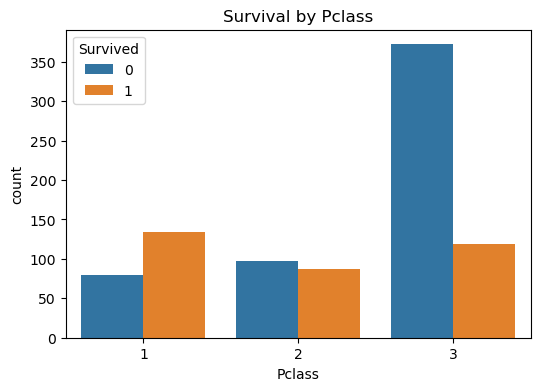

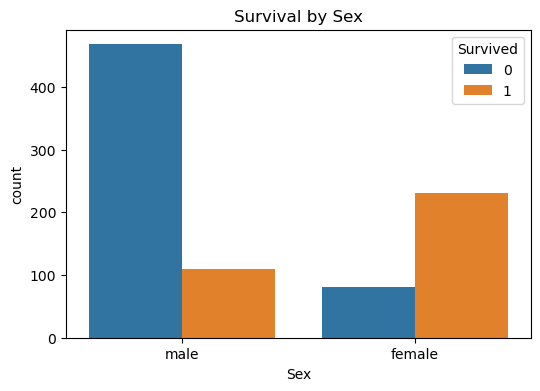

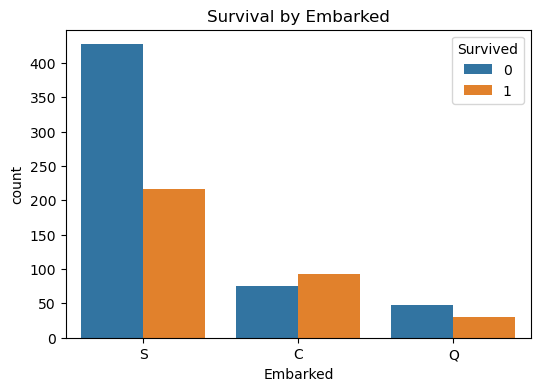

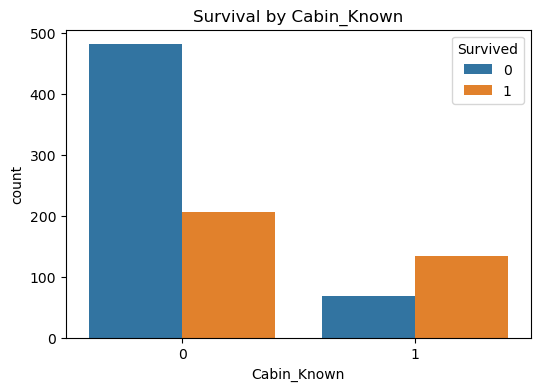

In [14]:
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Cabin_Known'] 

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Survived', data=update_df)
    plt.title(f'Survival by {col}')
    plt.show()


<h2>Titanic Dataset Insights</h2>
<ol>
  <li><strong>Passenger Class (Pclass):</strong> First-class passengers had the highest survival rate. Second-class passengers had roughly equal numbers of survivors and non-survivors, while the majority of third-class passengers did not survive.</li>
  <li><strong>Gender:</strong> Females had a significantly higher survival rate compared to males.</li>
  <li><strong>Port of Embarkation (Embarked):</strong> Passengers who boarded at Cherbourg (C) had a higher survival rate compared to other ports.</li>
  <li><strong>Cabin Information:</strong> Passengers with known cabin numbers had higher survival rates, indicating survival may be associated with having a cabin assigned.</li>
</ol>


In [15]:
update_df['AgeGroup'] = pd.cut(update_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 80], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-80'])



cols=['SibSp','Age','Parch']
for col in cols:
    sns.boxplot(y=col, data=update_df)
    plt.title("Boxplot of {col}")
    plt.show()


<Axes: xlabel='Survived', ylabel='Age'>

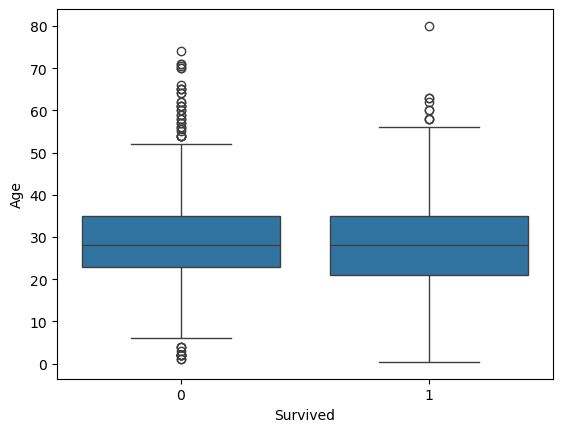

In [16]:
sns.boxplot(x='Survived', y='Age', data=update_df)


<Axes: xlabel='Parch', ylabel='count'>

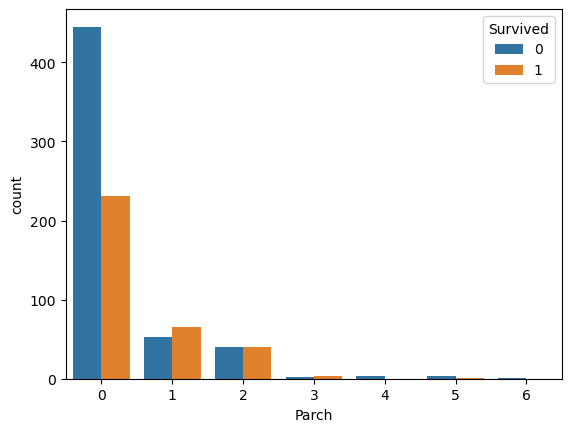

In [17]:
sns.countplot(x='Parch', hue='Survived', data=update_df)



<Axes: xlabel='SibSp', ylabel='count'>

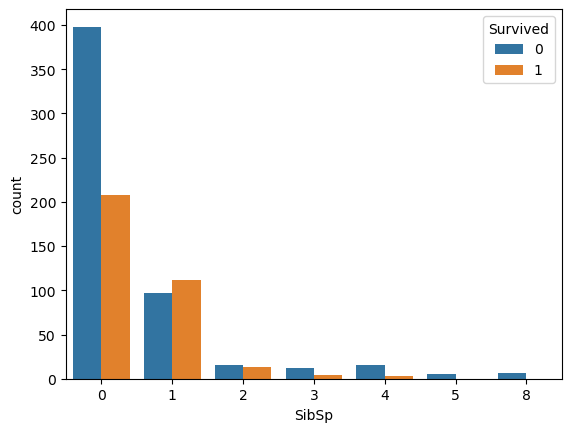

In [18]:
sns.countplot(x='SibSp', hue='Survived', data=update_df)

<h2>Titanic Dataset Insights</h2>
<ol>
  <li><strong>Age:</strong> Age alone might not be a very strong differentiator for survival since medians are similar.</li>
  <li><strong>Outliers in Age:</strong> Children and older people appear as outliers; some children survived while some elderly did not.</li>
  <li><strong>Other Factors:</strong> Other features like class, sex, or fare may influence survival more strongly than age.</li>
  <li><strong>Family Size (SibSp):</strong> Small families (1-2 siblings/spouses aboard) may have had the best chance of survival.</li>
  <li><strong>Parents/Children Aboard (Parch):</strong> Passengers with a small number of parents/children aboard (1-3) tended to have higher survival rates, while those alone (0) or with many family members had lower survival chances.</li>

</ol>




In [19]:
survivalrate1=update_df.groupby(['Pclass','Sex'])['Survived'].mean()*100
survivalrate1

Pclass  Sex   
1       female    96.739130
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

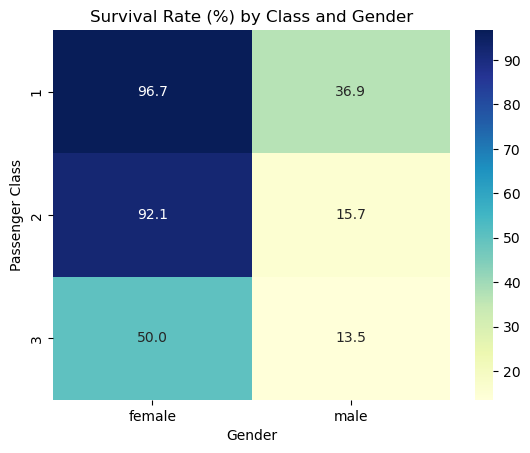

In [20]:
survivalrate1 = update_df.groupby(['Pclass','Sex'])['Survived'].mean().unstack() * 100

sns.heatmap(survivalrate1, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Survival Rate (%) by Class and Gender")
plt.ylabel("Passenger Class")
plt.xlabel("Gender")
plt.show()

<h2>Titanic Dataset Insights</h2>
<ol>
  <li>Women in all 3 classes survived more than men in their respective classes.</li>
  <li>Women in <b>1st Class</b> had the highest survival rate (<b>96.7%</b>), followed by <b>2nd Class</b> women (<b>92.1%</b>).</li>
  <li>Among men, <b>1st Class</b> males had the highest survival rate (<b>36.9%</b>), but still much lower than women in any class.</li>
  <li><b>3rd Class males</b> had the lowest survival rate at only <b>13.5%</b>.</li>
  <li>Overall, both <b>gender</b> and <b>passenger class</b> played a major role in survival chances. Women, especially in higher classes, were given clear priority during evacuation.</li>
</ol>


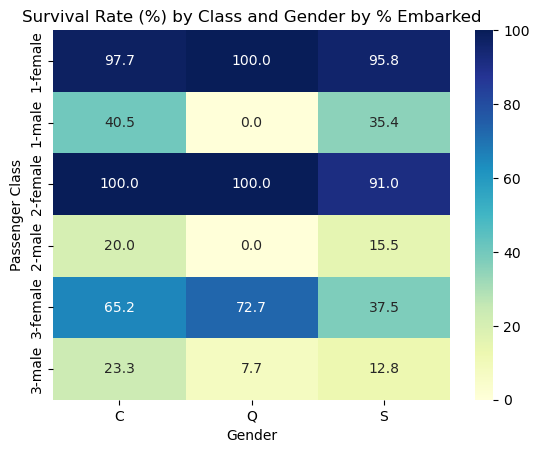

In [21]:
survivalrate2 = update_df.groupby(['Pclass','Sex','Embarked'])['Survived'].mean().unstack() * 100

sns.heatmap(survivalrate2, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Survival Rate (%) by Class and Gender by % Embarked")
plt.ylabel("Passenger Class")
plt.xlabel("Gender")
plt.show()

<h2>Insight: Gender, Class & Port of Embarkation</h2>
<ul>
  <li><b>Female passengers from Queenstown (Q)</b> had a <b>100% survival rate</b> — every woman who boarded from Q survived.</li>
  <li><b>Females from Cherbourg (C)</b> also had a higher survival rate compared to Southampton (S), likely because more of them traveled in higher classes.</li>
  <li><b>2nd Class women</b> enjoyed a very high survival rate (above 90%), showing that women were given priority even outside of 1st class.</li>
  <li>However, this privilege <b>did not extend to men of any class</b> and not to <b>3rd Class women</b>, whose survival dropped significantly.</li>
  <li><b>Conclusion:</b> Gender and class were the strongest predictors of survival, but the port of embarkation also influenced outcomes — especially for women in higher classes.</li>
</ul>


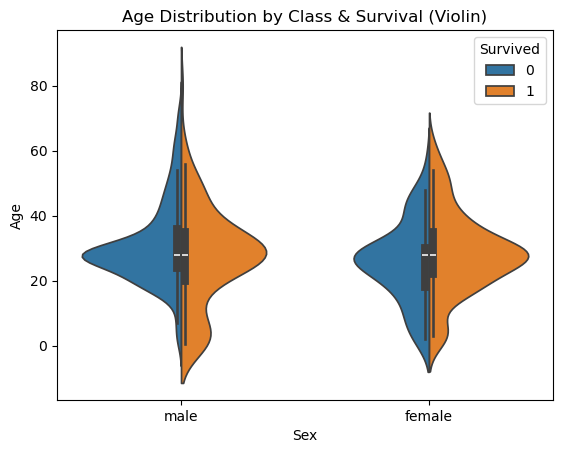

In [22]:

sns.violinplot(x="Sex", y="Age", hue="Survived", data=update_df, split=True)
plt.title("Age Distribution by Class & Survival (Violin)")
plt.show()


<h3>Age × Sex × Survival — Key Insights</h3>
<ul>
  <li>Females show much higher survival than males overall.</li>
  <li>The female survival advantage holds across all ages.</li>
  <li>Males have low survival at most ages, including adults.</li>
  <li>Children (~0–10 yrs) survive more than adults in both sexes.</li>
  <li>Most passengers are ~20–40 yrs, but survival in this band is far higher for females.</li>
</ul>


In [23]:
update_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Known,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,31-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,NaN,S,0,21-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,21-30


In [24]:
#IN ORDER TO GET A PAIR PLOT APPLYING to SEX USING LABEL ENCODING
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
update_df['Sex'] = le.fit_transform(update_df.Sex.values)
update_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Known,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,0,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1,31-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1,31-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,NaN,S,0,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,B42,S,1,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,NaN,S,0,21-30
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C148,C,1,21-30


In [25]:
update_df.Sex.value_counts()

Sex
1    577
0    312
Name: count, dtype: int64

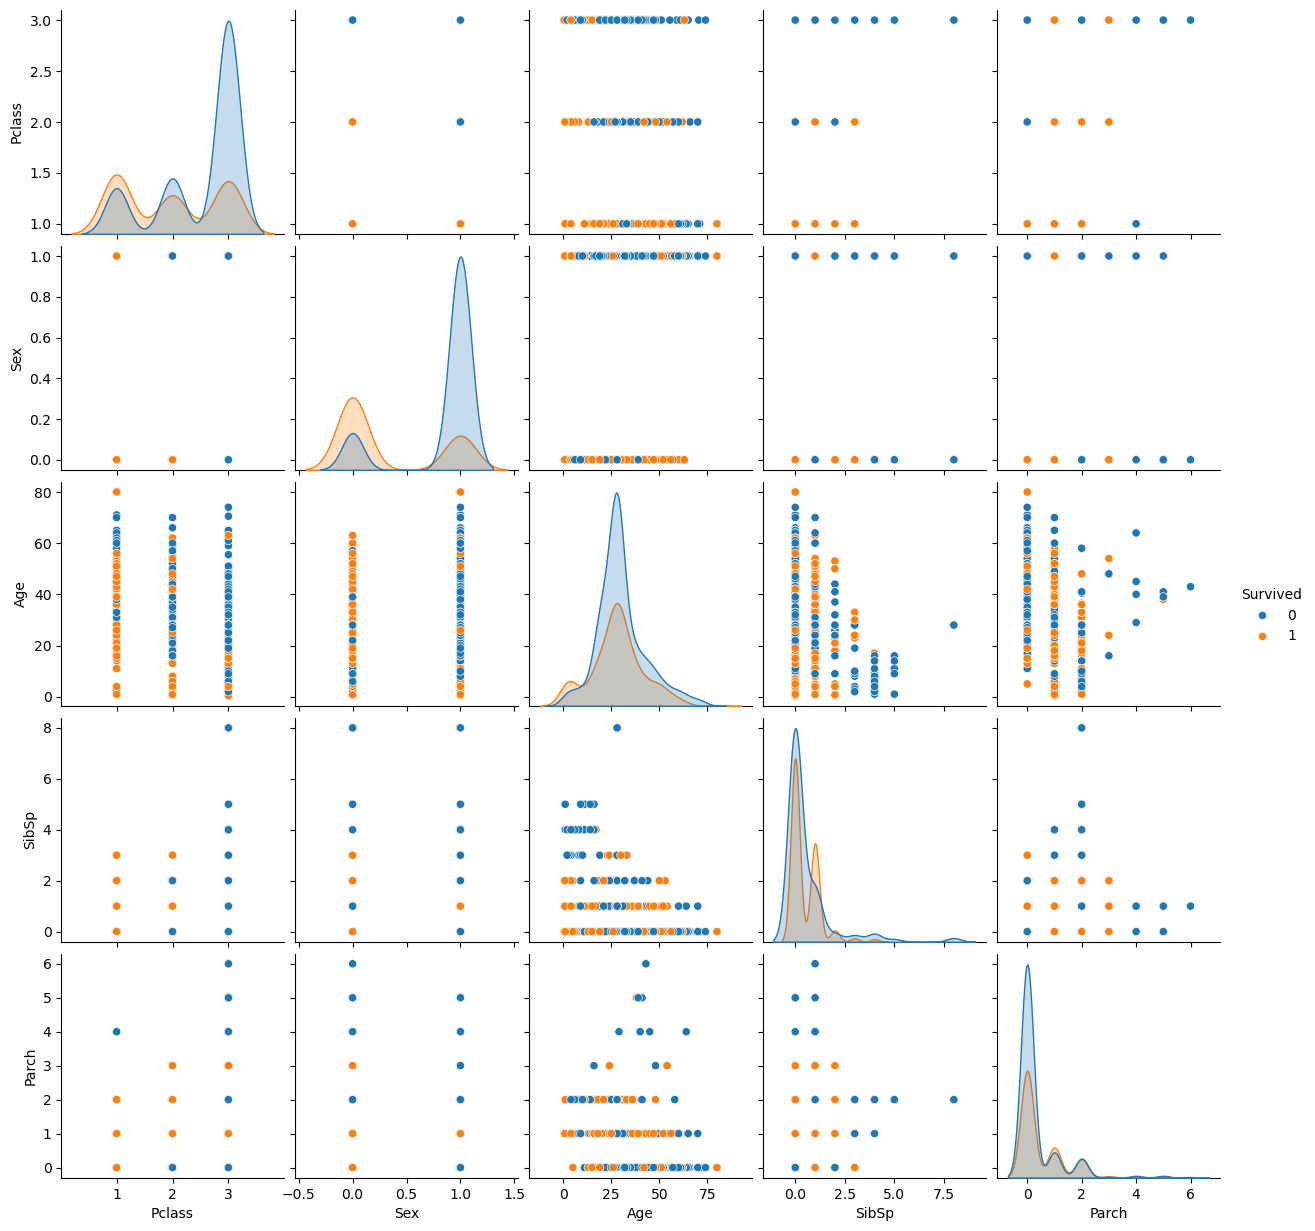

In [26]:
sns.pairplot(data=update_df,vars=['Pclass','Sex','Age','SibSp','Parch'],hue='Survived')

<h3>Key Insights (short)</h3>
<ol>
  <li><b>Pclass & Age:</b> 1st-class passengers (especially women) had the highest survival, many aged 20–60.</li>
  <li><b>2nd Class:</b> High survival for children and several older adults.</li>
  <li><b>3rd Class:</b> Lowest survival overall—even when traveling with family.</li>
  <li><b>Gender:</b> Females survived at much higher rates across most age groups.</li>
  <li><b>Children:</b> Ages 0–12 had higher survival than adults in both sexes.</li>
  <li><b>Male survivors:</b> Skewed younger; age helped some men but far less than it helped women.</li>
  <li><b>Family effect:</b> Having family on board increased survival in 1st class, but not in 3rd; women with family had the highest rates.</li>
</ol>


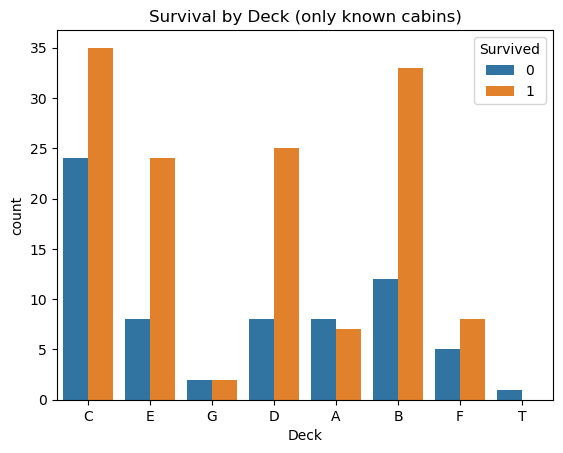

In [27]:
update_df['Deck'] = update_df['Cabin'].str[0].fillna('Unknown')
cabin_df = update_df.dropna(subset=['Cabin']).copy()  
sns.countplot(data=cabin_df, x='Deck', hue='Survived')
plt.title('Survival by Deck (only known cabins)')
plt.show()


In [28]:

update_df_model = update_df.copy()
update_df_model = update_df_model.drop(columns=['Cabin'])   # safe if you already have Deck and Cabin_Known
update_df_model

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Known,AgeGroup,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,0,21-30,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1,31-40,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,0,21-30,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,1,31-40,C
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,0,31-40,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,0,21-30,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,1,11-20,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,S,0,21-30,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,1,21-30,C


<div style="
  max-width:820px;
  margin:18px auto;
  padding:22px 24px;
  border-radius:14px;
  background: linear-gradient(180deg,#ffffff 0%, #f9fafb 100%);
  box-shadow: 0 8px 28px rgba(0,0,0,0.08);
  border: 1px solid rgba(0,0,0,0.08);
  font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
  color:#0f172a;
">
  <!-- Header -->
  <div style="display:flex; align-items:center; gap:14px;">
    <div style="width:50px; height:50px; border-radius:12px; display:flex; align-items:center; justify-content:center; 
                background: linear-gradient(135deg,#2563eb,#06b6d4); color:#fff; font-size:22px; box-shadow:0 6px 16px rgba(37,99,235,0.15);">
      🚢
    </div>
    <h3 style="margin:0; font-size:20px; color:#0b63d6;">Collective Storytelling Summary</h3>
  </div>

  <!-- Story -->
  <p style="margin:16px 0 14px; line-height:1.65; font-size:15px;">
    The Titanic tragedy was not random — survival strongly reflected <strong style="color:#0b63d6;">who you were</strong> 
    and <strong style="color:#0b63d6;">where you traveled</strong>. 
    Women and children, especially in <strong>1st & 2nd class</strong>, had the best odds, 
    while <strong style="color:#ef4444;">men in 3rd class</strong> faced the harshest fate. 
    Passengers from <strong style="color:#7c3aed;">Cherbourg</strong> and those with cabin assignments were more likely to survive, 
    showing the influence of wealth and privilege.
  </p>

  <!-- Systematic Insights -->
  <ul style="margin:0 0 14px 18px; padding:0; font-size:14.5px; line-height:1.6;">
    <li><b>Gender:</b> Women had significantly higher survival across all classes.</li>
    <li><b>Class:</b> First class survived most, third class least.</li>
    <li><b>Age:</b> Children fared better than adults; elderly struggled.</li>
    <li><b>Cabin:</b> Known cabin numbers linked to higher odds.</li>
    <li><b>Family:</b> Small families helped in higher classes; little benefit in 3rd class.</li>
  </ul>

  <!-- Tags -->
  <div style="margin-top:12px; display:flex; gap:10px; flex-wrap:wrap;">
    <span style="background:#eef2ff; color:#3730a3; padding:6px 12px; border-radius:999px; font-size:13px; font-weight:600;">Gender</span>
    <span style="background:#ecfdf5; color:#065f46; padding:6px 12px; border-radius:999px; font-size:13px; font-weight:600;">Class</span>
    <span style="background:#fff7ed; color:#92400e; padding:6px 12px; border-radius:999px; font-size:13px; font-weight:600;">Age</span>
    <span style="background:#fef2f2; color:#991b1b; padding:6px 12px; border-radius:999px; font-size:13px; font-weight:600;">Family</span>
    <span style="background:#f5f3ff; color:#5b21b6; padding:6px 12px; border-radius:999px; font-size:13px; font-weight:600;">Cabin</span>
  </div>

  <!-- Footer -->
  <div style="margin-top:18px; font-size:12.5px; color:#64748b; line-height:1.5;">
    <b>Limitations:</b> EDA shows associations, not causation. Missing values (e.g., cabins) may bias conclusions.  <br>
  </div>
</div>


## ✨ Insights to Predictions  

From the EDA, we saw that **gender** was the strongest predictor of survival.  
As a **baseline model**, instead of using machine learning,  
I’ll generate predictions using a simple rule:  

- Female → Survived = 1  
- Male → Survived = 0  

This produces the well-known `gender_submission.csv` file (a Kaggle baseline).


In [35]:
test = pd.read_csv("test.csv")

submission=pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived": test["Sex"].apply(lambda x:1 if x=="female" else 0)
})

submission.to_csv("gender_submission.csv",index=False)

In [36]:
submission.head(30)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


---

## 🚀 Next Steps  

<b>Next Steps:</b> Apply **feature engineering** (e.g., extract Title from Name, Deck from Cabin, FamilySize from SibSp/Parch)  
and then build **predictive models** using `train.csv` for stronger evidence and better accuracy on Kaggle.  


---